In [238]:
import pandas as pd
df=pd.read_csv('/Users/delia.cardenas/Downloads/ST - full_data_base (1).csv',decimal=',')

df_sentiment=pd.read_csv('data/pysentiment_chapter_clean.csv')


In [2]:
df=df.merge(df_sentiment[['Episode Number',
 'Pitch Number','POS','NEG',	'NEU']],
on=[ 'Episode Number',
 'Pitch Number'])

In [3]:
df=df.rename(columns={'NEG':'avg_neg_sentiment_inv',
                'NEU':'avg_neu_sentiment_inv',
                'POS':'avg_pos_sentiment_inv',
                'Valuation Requested':'valuation_requested',
                })

In [13]:
# Treatment names

In [4]:
import pandas as pd

# Lista original de nombres de columnas en tu DataFrame
original_column_names = [
    'varible', 'Startup Name', 'Episode Number', 'Pitch Number', 'Industry', 'industry clean ',
    'Business Description', 'Company Website', 'Pitchers Gender', 'Multiple Entrepreneurs',
    'Original Ask Amount', 'Original Offered Equity', 'valuation_requested', 'Got Deal',
    'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal',
    'Royalty Deal', 'Advisory Shares Equity', 'Loan', 'number of males', 'number of females',
    'brian requarth', 'marisa laso ', 'alejandra rios ', 'adriana gallardo ', 'alejandro litch',
    'marcos dantus', 'amaury vergara', 'karla berman', 'oso', 'recompra', 'equity recompra',
    'tiburones con oferta ', 'tiburones fuera', 'tiburon con oferta mujer',
    'tiburon con oferta hombre ', 'tiburon con deal mujer', 'tiburon con deal hombre ',
    'avg_pos_sentiment_inv', 'avg_neg_sentiment_inv', 'avg_neu_sentiment_inv'
]

# Limpieza de nombres de columnas
cleaned_column_names = [col.strip().lower().replace(' ', '_') for col in original_column_names]

# Crea un diccionario para renombrar columnas
rename_dict = dict(zip(original_column_names, cleaned_column_names))

# Renombrar las columnas del DataFrame

df.rename(columns=rename_dict, inplace=True)

print(df.head())



       varible        startup_name  episode_number  pitch_number  \
0  cap1-picth3          Transsalud               1             3   
1  cap1-picth2       blind creator               1             2   
2  cap1-picth1       Mole don luis               1             1   
3  cap2-picth4  Gasup master coffe               2             4   
4  cap2-picth3       soca exchange               2             3   

                     industry  industry_clean  \
0            Software & salud           Salud   
1      Software & technologia      Tecnología   
2                    Alimento       Alimentos   
3                   Alimento        Alimentos   
4  Sustenabilidad& reciclaje   Sustenabilidad   

                                business_description  \
0                          Enfocado a la salud trans   
1         gestionar  campañas de Influecer Marketing   
2                         Productora de mole gourmet   
3                                                NaN   
4  Closet ilimit

In [5]:

list(df)




# Diccionario de nombres actuales a nombres propuestos
rename_dict = {
    'varible':'key_chapter_pitch',
    'oso':'oswaldo_trava',
    'recompra': 'buyback',
    'equity_recompra': 'buyback_equity',
    'tiburones_con_oferta': 'investors_with_offer',
    'tiburones_fuera': 'investors_no_offer',
    'tiburon_con_oferta_mujer': 'female_investors_with_offer',
    'tiburon_con_oferta_hombre': 'male_investors_with_offer',
    'tiburon_con_deal_mujer': 'female_investors_with_deal',
    'tiburon_con_deal_hombre': 'male_investors_with_deal'
}

# Renombrar las columnas del DataFrame
df.rename(columns=rename_dict, inplace=True)

# Verificar los nuevos nombres de columnas
print(df.columns)


Index(['key_chapter_pitch', 'startup_name', 'episode_number', 'pitch_number',
       'industry', 'industry_clean', 'business_description', 'company_website',
       'pitchers_gender', 'multiple_entrepreneurs', 'original_ask_amount',
       'original_offered_equity', 'valuation_requested', 'got_deal',
       'total_deal_amount', 'total_deal_equity', 'deal_valuation',
       'number_of_sharks_in_deal', 'royalty_deal', 'advisory_shares_equity',
       'loan', 'number_of_males', 'number_of_females', 'brian_requarth',
       'marisa_laso', 'alejandra_rios', 'adriana_gallardo', 'alejandro_litch',
       'marcos_dantus', 'amaury_vergara', 'karla_berman', 'oswaldo_trava',
       'buyback', 'buyback_equity', 'investors_with_offer',
       'investors_no_offer', 'female_investors_with_offer',
       'male_investors_with_offer', 'female_investors_with_deal',
       'male_investors_with_deal', 'avg_pos_sentiment_inv',
       'avg_neg_sentiment_inv', 'avg_neu_sentiment_inv'],
      dtype='object')


In [6]:
columns_to_drop = [
    'brian_requarth',
 'marisa_laso',
 'alejandra_rios',
 'adriana_gallardo',
 'alejandro_litch',
 'marcos_dantus',
 'amaury_vergara',
 'karla_berman',
 'oswaldo_trava','industry'

]

# Assuming your DataFrame is named 'd'
df_c = df.drop(columns=columns_to_drop)

# Reemplazar valores únicos en la columna 'pitchers_gender'
df_c['pitchers_gender'].unique()
df_c.loc[df_c['pitchers_gender'] == 'mixto ', 'pitchers_gender'] = 'mixto'
df_c.loc[df_c['pitchers_gender'] == 'male ', 'pitchers_gender'] = 'male'

# Renombrar la columna corregida
df_c = df_c.rename(columns={'male_investors_with_deal ': 'male_investors_with_deal'})

# Convertir columnas relevantes a tipo float
df_c['original_ask_amount'] = df_c['original_ask_amount'].astype('float')
df_c['valuation_requested'] = df_c['valuation_requested'].astype('float')
df_c['deal_valuation'] = df_c['deal_valuation'].astype('float')


In [11]:
"""get conteo of pitchers gender and put in a bar plot with title 
'Shark tank pitchers gender count '
df_c['Pitchers Gender']

create a distributuon of ['Original Ask Amount'] by df_c['Ptchers Gender']
in the same image and put title Original amount request by the pitcher by gender


create a distributuon of ['Valuation Requested'] by df_c['Pitchers Gender']
in the same image and put title Valuation given request by the investor by pitcher gendergender

get proportion of got deal by pitchers gender create a barchar stacked 
df_c['Pitchers Gender'] df_c['Got Deal']"""

"get conteo of pitchers gender and put in a bar plot with title \n'Shark tank pitchers gender count '\ndf_c['Pitchers Gender']\n\ncreate a distributuon of ['Original Ask Amount'] by df_c['Ptchers Gender']\nin the same image and put title Original amount request by the pitcher by gender\n\n\ncreate a distributuon of ['Valuation Requested'] by df_c['Pitchers Gender']\nin the same image and put title Valuation given request by the investor by pitcher gendergender\n\nget proportion of got deal by pitchers gender create a barchar stacked \ndf_c['Pitchers Gender'] df_c['Got Deal']"

/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/2379423441.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_c['pitchers_gender'], order=gender_order, palette=gender_palette)


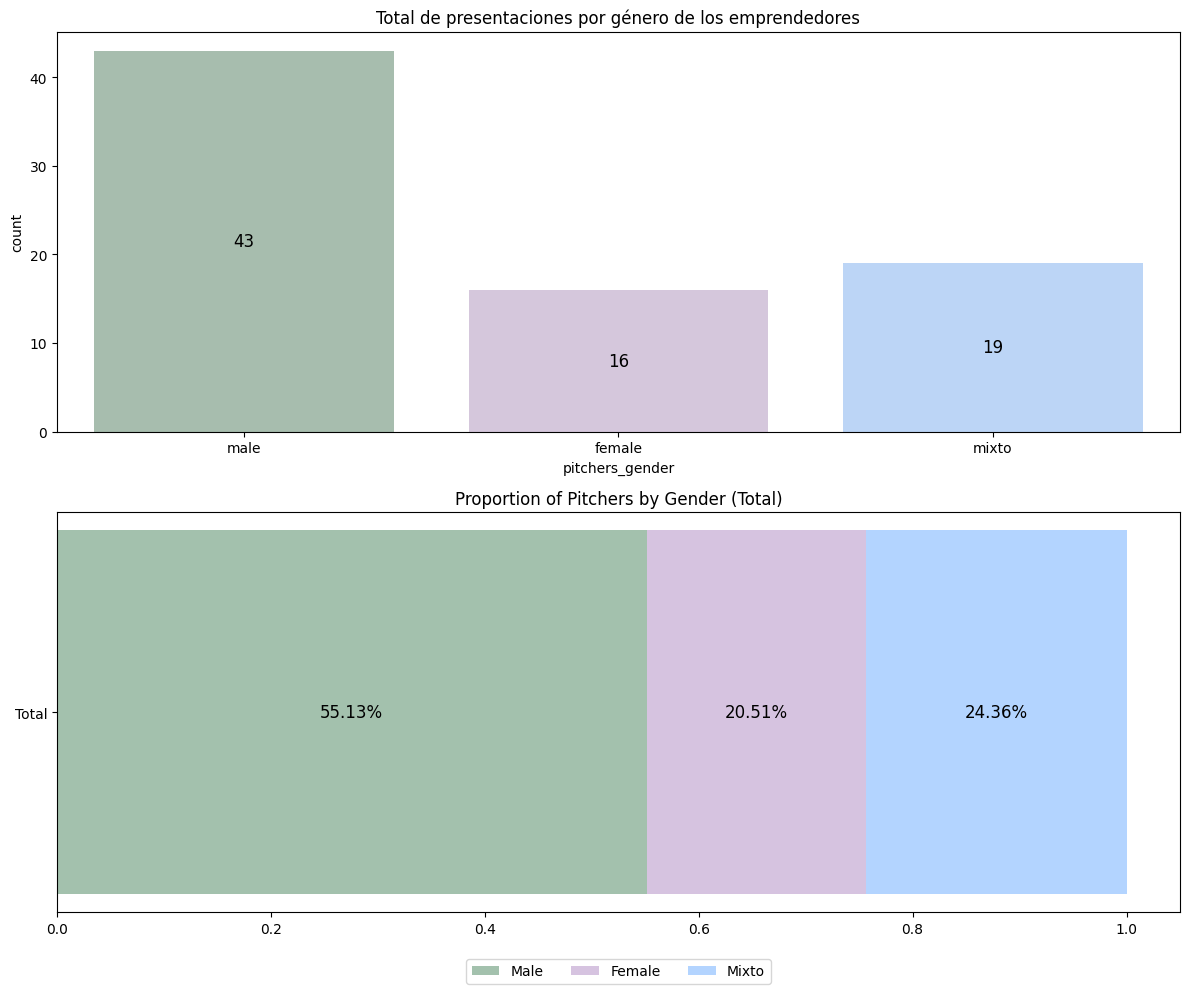

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))

# Crear un gráfico de barras para el recuento de pitches por género
plt.subplot(2, 1, 1)

# Especificar un orden fijo de los géneros y sus colores
gender_order = ['male', 'female', 'mixto']
gender_palette = {'male': '#A3C1AD', 'female': '#D6C3E0', 'mixto': '#B3D4FF'}

ax = sns.countplot(x=df_c['pitchers_gender'], order=gender_order, palette=gender_palette)  
plt.title('Total de presentaciones por género de los emprendedores')

# Agregar los valores dentro de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.),  # Ajusta la posición al centro de la barra
                ha='center', va='center', fontsize=12, color='black')
    

import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (Remove this when using your actual DataFrame)
# df_c = pd.DataFrame({
#     'Pitchers Gender': np.random.choice(['male', 'female', 'mixto'], size=100)  # Replace with your actual data
# })


plt.subplot(2, 1, 2)
gender_proportion = df_c['pitchers_gender'].value_counts(normalize=True)

plt.barh(['Total'], gender_proportion['male'], color='#A3C1AD', label='Male')
plt.barh(['Total'], gender_proportion['female'], left=gender_proportion['male'], color='#D6C3E0', label='Female')
plt.barh(['Total'], gender_proportion['mixto'], left=gender_proportion['male'] + gender_proportion['female'], color='#B3D4FF', label='Mixto')

# Annotate percentages on the bars
plt.text(gender_proportion['male'] / 2, 0, f"{gender_proportion['male'] * 100:.2f}%", va='center', ha='center', fontsize=12)
plt.text(gender_proportion['male'] + gender_proportion['female'] / 2, 0, f"{gender_proportion['female'] * 100:.2f}%", va='center', ha='center', fontsize=12)
plt.text(gender_proportion['male'] + gender_proportion['female'] + gender_proportion['mixto'] / 2, 0, f"{gender_proportion['mixto'] * 100:.2f}%", va='center', ha='center', fontsize=12)

plt.title('Proportion of Pitchers by Gender (Total)')

# Modify legend to place it below the chart in a horizontal layout
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=True)

plt.tight_layout()
plt.show()


/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/1447610099.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_c['pitchers_gender'], order=gender_order, palette=gender_palette)


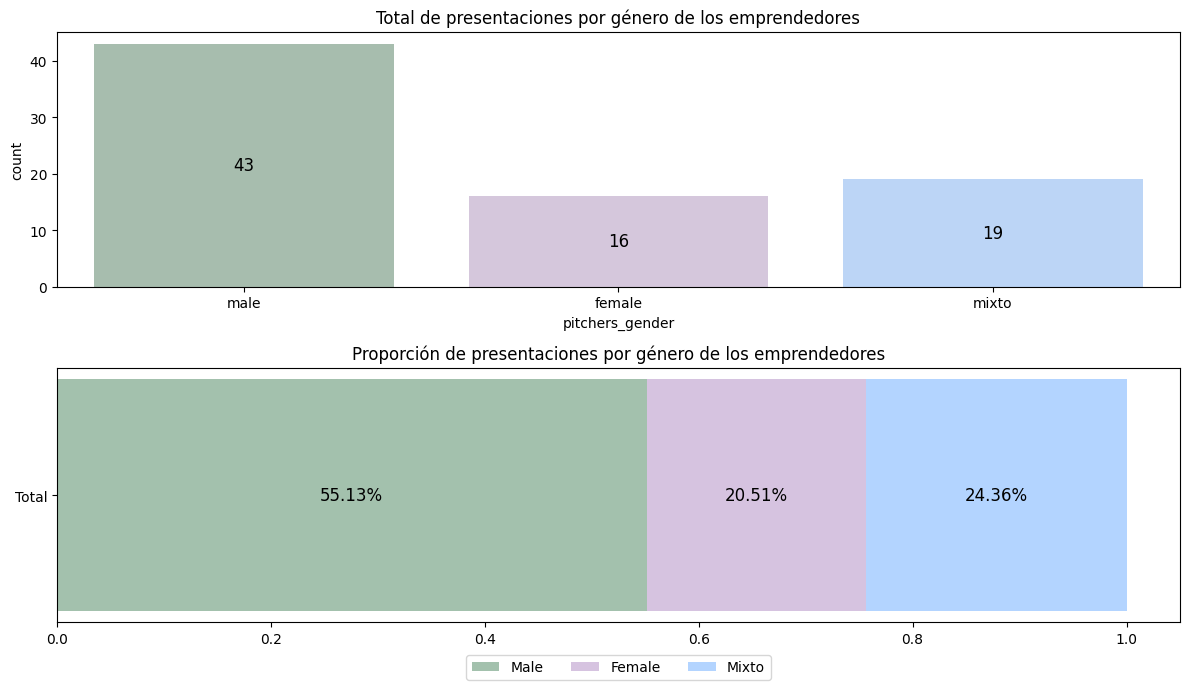

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que tienes tu DataFrame df_c
# Asegúrate de que los datos están bien cargados y preprocesados

plt.figure(figsize=(12, 7))  # Ajustar la altura para hacer la gráfica más delgada

# Primer gráfico: recuento de pitches por género
plt.subplot(2, 1, 1)

# Especificar un orden fijo de los géneros y sus colores
gender_order = ['male', 'female', 'mixto']
gender_palette = {'male': '#A3C1AD', 'female': '#D6C3E0', 'mixto': '#B3D4FF'}

ax = sns.countplot(x=df_c['pitchers_gender'], order=gender_order, palette=gender_palette)
plt.title('Total de presentaciones por género de los emprendedores')

# Agregar los valores dentro de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='black')

# Segundo gráfico: proporción de pitches por género en barras horizontales
plt.subplot(2, 1, 2)
gender_proportion = df_c['pitchers_gender'].value_counts(normalize=True)

# Graficar las barras horizontales
plt.barh(['Total'], gender_proportion['male'], color='#A3C1AD', label='Male')
plt.barh(['Total'], gender_proportion['female'], left=gender_proportion['male'], color='#D6C3E0', label='Female')
plt.barh(['Total'], gender_proportion['mixto'], left=gender_proportion['male'] + gender_proportion['female'], color='#B3D4FF', label='Mixto')

# Agregar los porcentajes a las barras
plt.text(gender_proportion['male'] / 2, 0, f"{gender_proportion['male'] * 100:.2f}%", va='center', ha='center', fontsize=12)
plt.text(gender_proportion['male'] + gender_proportion['female'] / 2, 0, f"{gender_proportion['female'] * 100:.2f}%", va='center', ha='center', fontsize=12)
plt.text(gender_proportion['male'] + gender_proportion['female'] + gender_proportion['mixto'] / 2, 0, f"{gender_proportion['mixto'] * 100:.2f}%", va='center', ha='center', fontsize=12)

# Título para el segundo gráfico
plt.title('Proporción de presentaciones por género de los emprendedores')

# Modificar la leyenda para que se coloque abajo del gráfico en una disposición horizontal
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=True)

plt.tight_layout()
plt.show()


# Valuation request vs deal only deals aproved

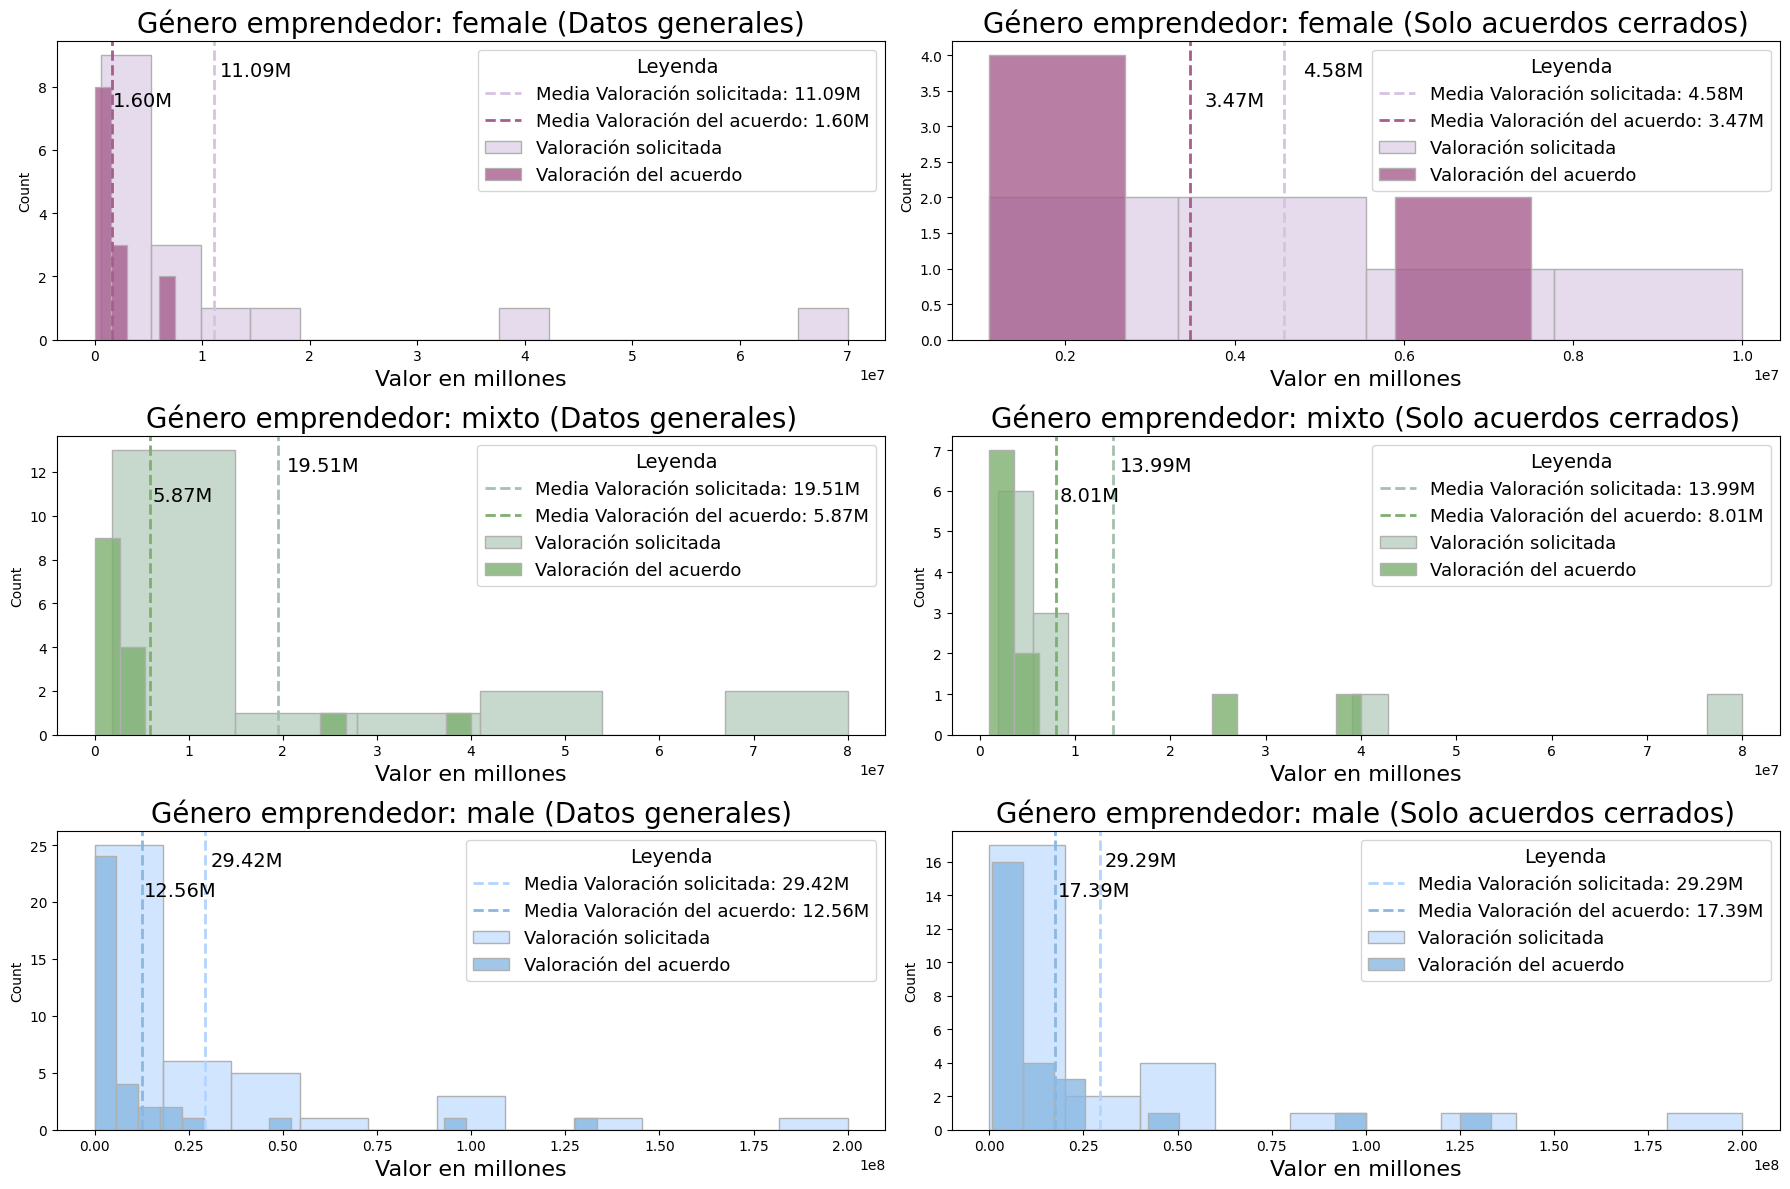

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_c es tu DataFrame con la nueva nomenclatura
generos = df_c['pitchers_gender'].unique()  # Actualizado a nueva nomenclatura
plt.figure(figsize=(18, 12))  # Ajustar el tamaño de la figura

# Definir colores
colores = {
    'female': '#D6C3E0',         # Pastel Violet
    'mixto': '#A3C1AD',          # Pastel Green
    'male': '#B3D4FF',           # Light Blue
}

# Colores más fuertes para 'deal_valuation'
colores_fuertes = {
    'female': '#A65E8D',         # Stronger Violet
    'mixto': '#7DAF70',          # Stronger Green
    'male': '#8AB8E2',           # Stronger Blue
}

# Primer conjunto de gráficos (sin filtrar los datos)
for i, genero in enumerate(generos):
    plt.subplot(len(generos), 2, i*2+1)  # Gráficos en la columna izquierda
    
    # Filtrar datos para el género actual (sin filtrar por trato)
    gender_data = df_c[df_c['pitchers_gender'] == genero]
    
    # Calcular la media de 'valuation_requested' y 'deal_valuation' (en millones)
    media_valuation_requested = gender_data['valuation_requested'].mean() / 1000000
    media_deal_valuation = gender_data['deal_valuation'].mean() / 1000000
    
    # Graficar 'valuation_requested'
    sns.histplot(gender_data, x='valuation_requested', kde=False, color=colores[genero], label='Valoración solicitada', alpha=0.6, edgecolor='#B0B0B0')
    sns.histplot(gender_data, x='deal_valuation', kde=False, color=colores_fuertes[genero], label='Valoración del acuerdo', alpha=0.8, edgecolor='#B0B0B0')
    
    # Agregar líneas verticales para las medias
    plt.axvline(media_valuation_requested * 1000000, color=colores[genero], linestyle='dashed', linewidth=2, label=f'Media Valoración solicitada: {media_valuation_requested:.2f}M')
    plt.axvline(media_deal_valuation * 1000000, color=colores_fuertes[genero], linestyle='dashed', linewidth=2, label=f'Media Valoración del acuerdo: {media_deal_valuation:.2f}M')
    
    # Agregar texto para los valores medios junto a las líneas
    plt.text(media_valuation_requested * 1000000 + 0.05 * media_valuation_requested * 1000000, plt.ylim()[1] * 0.9, f'{media_valuation_requested:.2f}M', color='black', va='center', fontsize=14)
    plt.text(media_deal_valuation * 1000000 + 0.05 * media_deal_valuation * 1000000, plt.ylim()[1] * 0.8, f'{media_deal_valuation:.2f}M', color='black', va='center', fontsize=14)
    
    # Establecer título en español y agregar leyenda
    plt.title(f'Género emprendedor: {genero} (Datos generales)', fontsize=20)  # Aumentar tamaño del título
    plt.xlabel('Valor en millones', fontsize=16)  # Etiqueta en el eje X
    plt.legend(title='Leyenda', fontsize=13, title_fontsize=14)  # Ajustar tamaños de la leyenda

# Segundo conjunto de gráficos (solo con datos de trato)
for i, genero in enumerate(generos):
    plt.subplot(len(generos), 2, i*2+2)  # Gráficos en la columna derecha
    
    # Filtrar datos para el género actual (solo los que obtuvieron un trato)
    gender_data = df_c[(df_c['pitchers_gender'] == genero) & (df_c['deal_valuation'] > 0)]
    
    # Calcular la media para 'valuation_requested' y 'deal_valuation' (en millones)
    media_valuation_requested = gender_data['valuation_requested'].mean() / 1000000
    media_deal_valuation = gender_data['deal_valuation'].mean() / 1000000
    
    # Graficar 'valuation_requested'
    sns.histplot(gender_data, x='valuation_requested', kde=False, color=colores[genero], label='Valoración solicitada', alpha=0.6, edgecolor='#B0B0B0')
    sns.histplot(gender_data, x='deal_valuation', kde=False, color=colores_fuertes[genero], label='Valoración del acuerdo', alpha=0.8, edgecolor='#B0B0B0')
    
    # Agregar líneas verticales para las medias
    plt.axvline(media_valuation_requested * 1000000, color=colores[genero], linestyle='dashed', linewidth=2, label=f'Media Valoración solicitada: {media_valuation_requested:.2f}M')
    plt.axvline(media_deal_valuation * 1000000, color=colores_fuertes[genero], linestyle='dashed', linewidth=2, label=f'Media Valoración del acuerdo: {media_deal_valuation:.2f}M')
    
    # Agregar texto para los valores medios junto a las líneas
    plt.text(media_valuation_requested * 1000000 + 0.05 * media_valuation_requested * 1000000, plt.ylim()[1] * 0.9, f'{media_valuation_requested:.2f}M', color='black', va='center', fontsize=14)
    plt.text(media_deal_valuation * 1000000 + 0.05 * media_deal_valuation * 1000000, plt.ylim()[1] * 0.8, f'{media_deal_valuation:.2f}M', color='black', va='center', fontsize=14)
    
    # Establecer título en español y agregar leyenda
    plt.title(f'Género emprendedor: {genero} (Solo acuerdos cerrados)', fontsize=20)  # Aumentar tamaño del título
    plt.xlabel('Valor en millones', fontsize=16)  # Etiqueta en el eje X
    plt.legend(title='Leyenda', fontsize=13, title_fontsize=14)  # Ajustar tamaños de la leyenda

plt.tight_layout()
plt.show()



In [112]:
gender_data['valuation_requested'].mean()

29285491.846153848

In [117]:
media_valuation_requested = gender_data['valuation_requested'].mean() / 1000000
media_valuation_requested



29.28549184615385

/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/3432996217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data['valuation_requested_m']=gender_data['valuation_requested'] / 1000000


<Axes: >

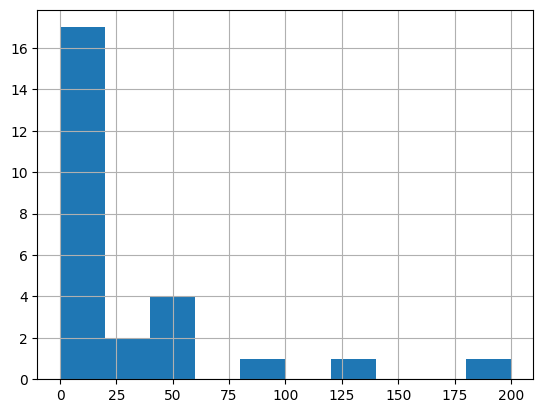

In [108]:
gender_data['valuation_requested_m']=gender_data['valuation_requested'] / 1000000

gender_data['valuation_requested_m'].hist()

In [134]:
df_c.groupby('pitchers_gender')['deal_valuation'].mean()


pitchers_gender
female    1.602098e+06
male      1.255836e+07
mixto     5.872698e+06
Name: deal_valuation, dtype: float64

In [ ]:
listdf_c

In [137]:
import pandas as pd

# Filtrar los acuerdos con valuación mayor a 0
acuerdos = df_c[df_c['deal_valuation'] > 0]

# Calcular la media y el conteo de deal_valuation por género
media_acuerdos = acuerdos.groupby('pitchers_gender')['deal_valuation'].mean()
conteo_acuerdos = acuerdos.groupby('pitchers_gender')['deal_valuation'].count()

# Mostrar resultados
print("Media de valuación de acuerdos:")
print(media_acuerdos)

print("\nNúmero de acuerdos:")
print(conteo_acuerdos)


Media de valuación de acuerdos:
pitchers_gender
female    3.471212e+06
male      1.738850e+07
mixto     8.008225e+06
Name: deal_valuation, dtype: float64

Número de acuerdos:
pitchers_gender
female     6
male      26
mixto     11
Name: deal_valuation, dtype: int64


In [136]:
acuerdos=df_c[ (df_c['deal_valuation'] > 0)]
    
acuerdos.groupby('pitchers_gender')['deal_valuation'].mean()


pitchers_gender
female    3.471212e+06
male      1.738850e+07
mixto     8.008225e+06
Name: deal_valuation, dtype: float64

/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/1981741488.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data['valuation_requested']=gender_data['valuation_requested'] / 1000000
/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/1981741488.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data['deal_valuation']=gender_data['deal_valuation'] / 1000000
/var/folders/1w/28rhqnw11lx_fz4tln3p0p240000gq/T/ipykernel_4093/1981741488.py:36: SettingWithCopyWarning: 

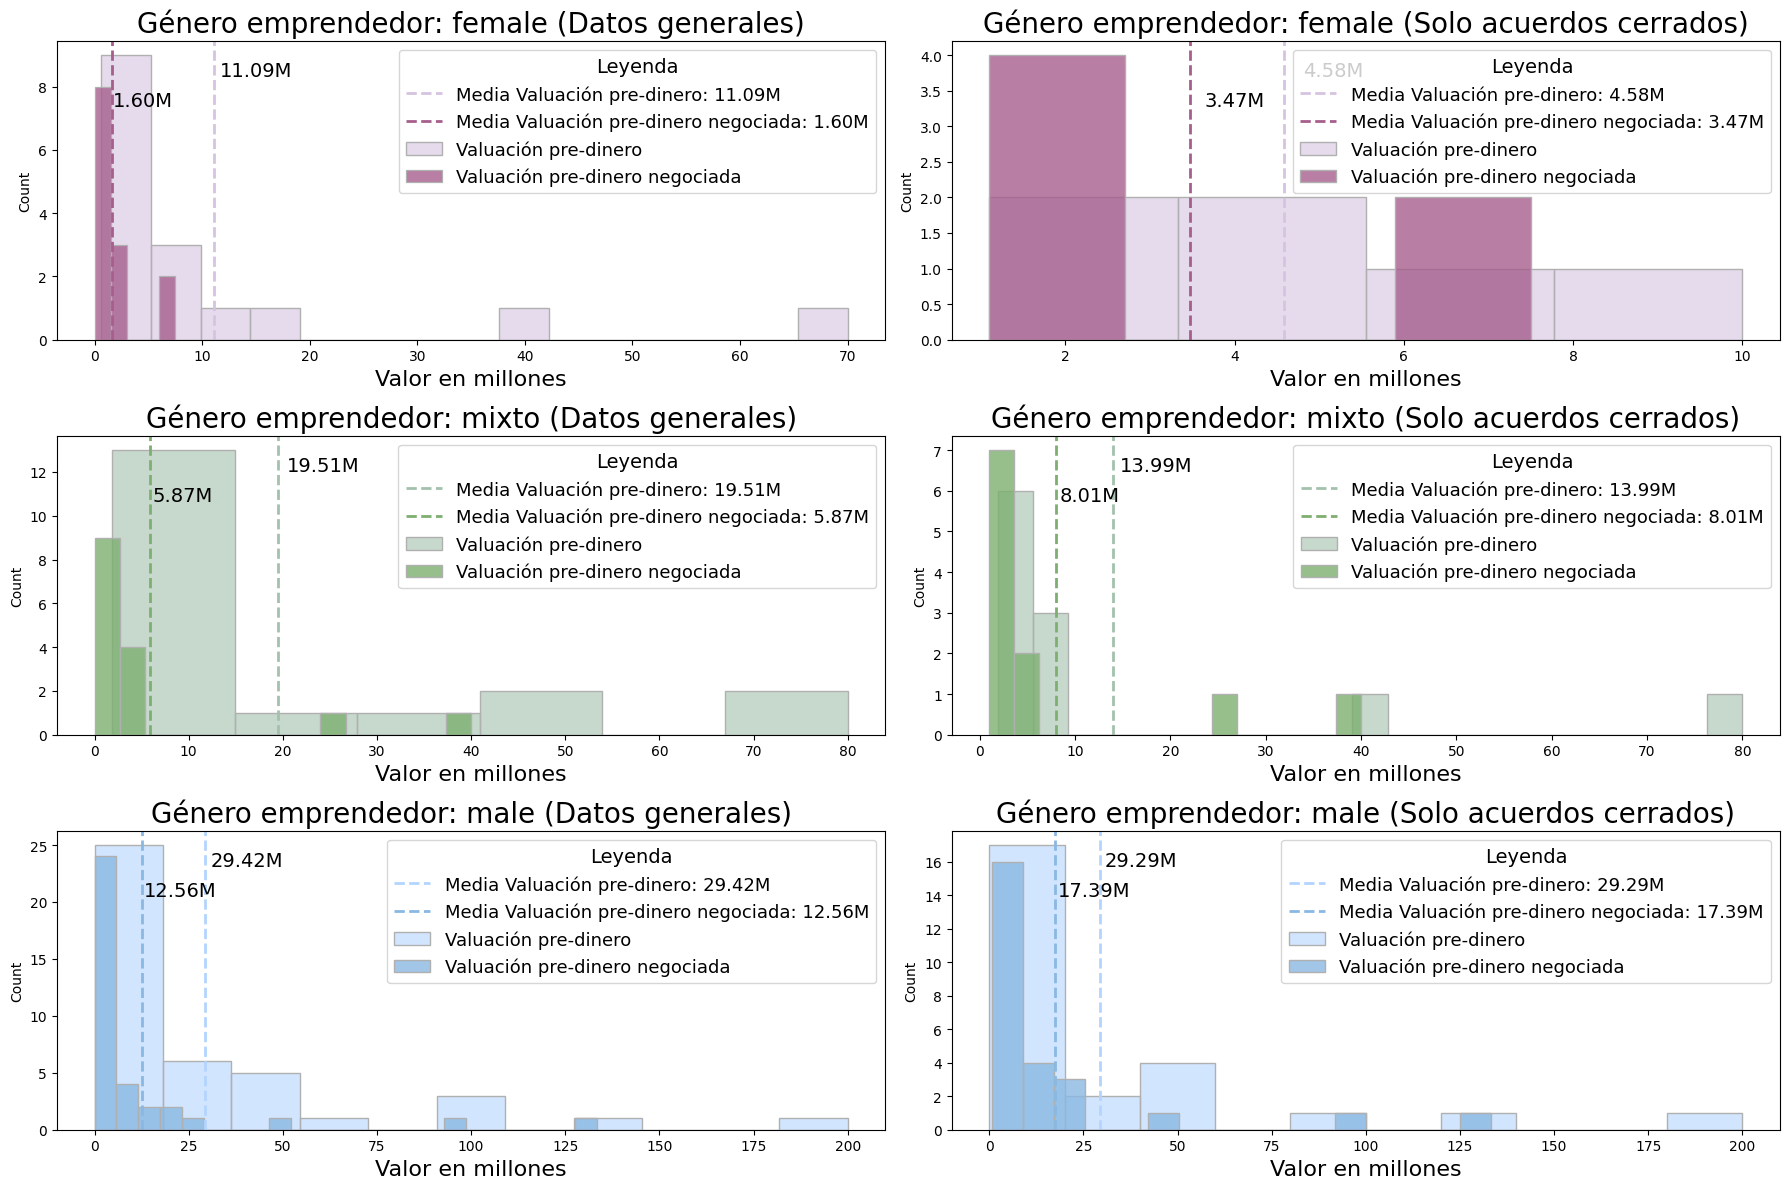

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_c es tu DataFrame con la nueva nomenclatura
generos = df_c['pitchers_gender'].unique()  # Actualizado a nueva nomenclatura
plt.figure(figsize=(18, 12))  # Ajustar el tamaño de la figura

# Definir colores
colores = {
    'female': '#D6C3E0',         # Pastel Violet
    'mixto': '#A3C1AD',          # Pastel Green
    'male': '#B3D4FF',           # Light Blue
}

# Colores más fuertes para 'deal_valuation'
colores_fuertes = {
    'female': '#A65E8D',         # Stronger Violet
    'mixto': '#7DAF70',          # Stronger Green
    'male': '#8AB8E2',           # Stronger Blue
}

# Primer conjunto de gráficos (sin filtrar los datos)
for i, genero in enumerate(generos):
    plt.subplot(len(generos), 2, i*2+1)  # Gráficos en la columna izquierda
    
    # Filtrar datos para el género actual (sin filtrar por trato)
    gender_data = df_c[df_c['pitchers_gender'] == genero]
    
    # Calcular la media de 'valuation_requested' y 'deal_valuation' (en millones)
    media_valuation_requested = gender_data['valuation_requested'].mean() / 1000000
    media_deal_valuation = gender_data['deal_valuation'].mean() / 1000000

    gender_data['valuation_requested']=gender_data['valuation_requested'] / 1000000
    gender_data['deal_valuation']=gender_data['deal_valuation'] / 1000000

    gender_data['valuation_requested']= gender_data['valuation_requested'].round(6)
    gender_data['deal_valuation']= gender_data['deal_valuation'].round(6)


    # Graficar 'valuation_requested'
    sns.histplot(gender_data, x='valuation_requested', kde=False, color=colores[genero], label='Valuación pre-dinero', alpha=0.6, edgecolor='#B0B0B0')
    sns.histplot(gender_data, x='deal_valuation', kde=False, color=colores_fuertes[genero], label='Valuación pre-dinero negociada', alpha=0.8, edgecolor='#B0B0B0')
    
    # Agregar líneas verticales para las medias
    plt.axvline(media_valuation_requested , color=colores[genero], linestyle='dashed', linewidth=2, label=f'Media Valuación pre-dinero: {media_valuation_requested:.2f}M')
    plt.axvline(media_deal_valuation , color=colores_fuertes[genero], linestyle='dashed', linewidth=2, label=f'Media Valuación pre-dinero negociada: {media_deal_valuation:.2f}M')
    
    # Agregar texto para los valores medios junto a las líneas
    plt.text(media_valuation_requested  + 0.05 * media_valuation_requested , plt.ylim()[1] * 0.9, f'{media_valuation_requested:.2f}M', color='black', va='center', fontsize=14)
    plt.text(media_deal_valuation  + 0.05 * media_deal_valuation , plt.ylim()[1] * 0.8, f'{media_deal_valuation:.2f}M', color='black', va='center', fontsize=14)
    
    # Establecer título en español y agregar leyenda
    plt.title(f'Género emprendedor: {genero} (Datos generales)', fontsize=20)  # Aumentar tamaño del título
    plt.xlabel('Valor en millones', fontsize=16)  # Etiqueta en el eje X
    plt.legend(title='Leyenda', fontsize=13, title_fontsize=14)  # Ajustar tamaños de la leyenda

# Segundo conjunto de gráficos (solo con datos de trato)
for i, genero in enumerate(generos):
    plt.subplot(len(generos), 2, i*2+2)  # Gráficos en la columna derecha
    
    # Filtrar datos para el género actual (solo los que obtuvieron un trato)
    gender_data = df_c[(df_c['pitchers_gender'] == genero) & (df_c['deal_valuation'] > 0)]
    
    # Calcular la media para 'valuation_requested' y 'deal_valuation' (en millones)
    media_valuation_requested = gender_data['valuation_requested'].mean() / 1000000
    media_deal_valuation = gender_data['deal_valuation'].mean() / 1000000

    gender_data['valuation_requested']=gender_data['valuation_requested'] / 1000000
    gender_data['deal_valuation']=gender_data['deal_valuation'] / 1000000

    gender_data['valuation_requested']= gender_data['valuation_requested'].round(6)
    gender_data['deal_valuation']= gender_data['deal_valuation'].round(6)

    
    # Graficar 'valuation_requested'
    sns.histplot(gender_data, x='valuation_requested', kde=False, color=colores[genero], label='Valuación pre-dinero', alpha=0.6, edgecolor='#B0B0B0')
    sns.histplot(gender_data, x='deal_valuation', kde=False, color=colores_fuertes[genero], label='Valuación pre-dinero negociada', alpha=0.8, edgecolor='#B0B0B0')
    
    # Agregar líneas verticales para las medias
    plt.axvline(media_valuation_requested , color=colores[genero], linestyle='dashed', linewidth=2, label=f'Media Valuación pre-dinero: {media_valuation_requested:.2f}M')
    plt.axvline(media_deal_valuation, color=colores_fuertes[genero], linestyle='dashed', linewidth=2, label=f'Media Valuación pre-dinero negociada: {media_deal_valuation:.2f}M')
    
    # Agregar texto para los valores medios junto a las líneas
    plt.text(media_valuation_requested  + 0.05 * media_valuation_requested, plt.ylim()[1] * 0.9, f'{media_valuation_requested:.2f}M', color='black', va='center', fontsize=14)
    plt.text(media_deal_valuation + 0.05 * media_deal_valuation, plt.ylim()[1] * 0.8, f'{media_deal_valuation:.2f}M', color='black', va='center', fontsize=14)
    
    # Establecer título en español y agregar leyenda
    plt.title(f'Género emprendedor: {genero} (Solo acuerdos cerrados)', fontsize=20)  # Aumentar tamaño del título
    plt.xlabel('Valor en millones', fontsize=16)  # Etiqueta en el eje X
    plt.legend(title='Leyenda', fontsize=13, title_fontsize=14)  # Ajustar tamaños de la leyenda

plt.tight_layout()
plt.show()


In [126]:
import numpy as np
import statsmodels.api as sm

# Datos
p_female = 56.2 / 100  # Proporción de acuerdos logrados por mujeres
p_male = 34.9 / 100  # Proporción de acuerdos logrados por hombres
n_female = 16  # Tamaño de la muestra de mujeres
n_male = 43  # Tamaño de la muestra de hombres

# Número de éxitos (acuerdos logrados)
success_female = int(p_female * n_female)
success_male = int(p_male * n_male)

# Prueba de hipótesis (prueba z para dos proporciones)
count = np.array([success_male, success_female])
nobs = np.array([n_male, n_female])
z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='smaller')

# Resultados
print(f"Estadístico Z: {z_stat:.4f}")
print(f"Valor p: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los hombres logran más acuerdos que las mujeres.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los hombres logran más acuerdos que las mujeres.")


Estadístico Z: -1.0584
Valor p: 0.14494
No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los hombres logran más acuerdos que las mujeres.


In [127]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Datos
p_female = 56.2 / 100  # Proporción de mujeres con acuerdo
p_male = 34.9 / 100    # Proporción de hombres con acuerdo
n_female = 16          # Número de mujeres
n_male = 43            # Número de hombres

# Número de éxitos
x_female = p_female * n_female
x_male = p_male * n_male

# Realizar la prueba de hipótesis de diferencia de proporciones
count = np.array([x_female, x_male])  # Éxitos (acuerdos logrados)
nobs = np.array([n_female, n_male])  # Tamaños de las muestras

# Prueba de una cola (H1: p_m > p_f)
stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Resultados
print(f"Estadístico Z: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Evaluar si se rechaza o no la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La proporción de acuerdos logrados por hombres es mayor que la de mujeres.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar que la proporción de acuerdos logrados por hombres es mayor que la de mujeres.")


Estadístico Z: 1.4807
Valor p: 0.0693
No rechazamos la hipótesis nula: No hay suficiente evidencia para afirmar que la proporción de acuerdos logrados por hombres es mayor que la de mujeres.


In [125]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Proportion deal that received by gender 




In [17]:
df_c['Prop_valuation_requested']=df_c['deal_valuation']/df_c['valuation_requested']

In [20]:
df_c['Prop_equity']=df_c['total_deal_amount']/df_c['deal_valuation']

In [24]:
df_c[['Prop_equity','total_deal_equity','deal_valuation']]

,Prop_equity,total_deal_equity,deal_valuation
0,inf,0,0.0
1,0.10,10%,40000000.0
2,0.21,"0,21",4761905.0
3,0.20,"0,2",5000000.0
4,NaN,0,0.0
...,...,...,...
73,NaN,"0,00",0.0
74,0.16,"0,16",1875000.0
75,0.15,"0,15",7800000.0
76,0.20,"0,20",2500000.0


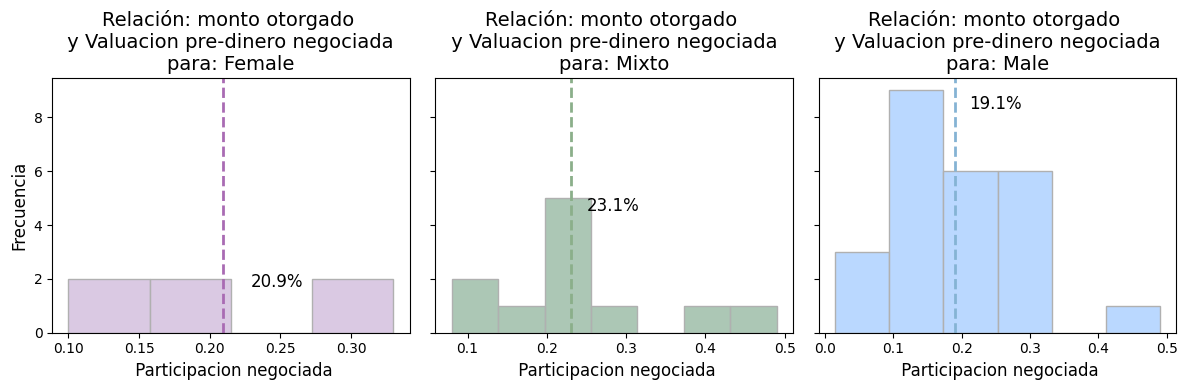

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos de ejemplo (reemplazar con tu DataFrame real)
# df_c = pd.DataFrame({
#     'Prop_valuation_requested': np.random.rand(100),  # Reemplazar con tus datos reales
#     'pitchers_gender': np.random.choice(['male', 'female', 'mixto'], size=100),  # Reemplazar con tus datos reales
#     'deal_valuation': np.random.rand(100) * 100,  # Reemplazar con tus datos reales
#     'valuation_requested': np.random.rand(100) * 100  # Reemplazar con tus datos reales
# })

# Colores por género
colores = {
    'female': '#D6C3E0',         # Violeta pastel
    'mixto': '#A3C1AD',          # Verde pastel
    'male': '#B3D4FF',           # Azul claro
}

# Colores más intensos para las líneas de las medias
colores_medias = {
    'female': '#A96BB3',         # Violeta más intenso
    'mixto': '#8BAF8A',          # Verde más intenso
    'male': '#85B3D4',           # Azul más intenso
}

# Configurar el tamaño de la figura para subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(colores), figsize=(12, 4), sharey=True)  # Altura ajustada (4 en vez de 6)

# Iterar sobre los géneros únicos y crear un histograma para cada uno
for ax, (genero, color) in zip(axes, colores.items()):
    # Filtrar datos para el género actual
    datos = df_c[
        (df_c['pitchers_gender'] == genero) & 
        (df_c['deal_valuation'] > 0) & 
        (df_c['valuation_requested'] > 0)
    ]
    
    # Calcular el valor medio de 'Prop_valuation_requested'
    media_valor = datos['Prop_equity'].mean()
    
    # Crear histograma con seaborn
    sns.histplot(datos, x='Prop_equity', kde=False, ax=ax, color=color, alpha=0.9, edgecolor='#B0B0B0')
    
    # Agregar una línea vertical para la media
    ax.axvline(media_valor, color=colores_medias[genero], linestyle='dashed', linewidth=2)
    
    # Anotar el valor medio en el histograma
    ax.text(media_valor + 0.02, ax.get_ylim()[1] * 0.9, f'{media_valor * 100:.1f}%', color='black', va='center', fontsize=12)
  
    # Títulos y etiquetas en español
    ax.set_title(f'Relación: monto otorgado \n y Valuacion pre-dinero negociada \npara: {genero.capitalize()}', fontsize=14)
    ax.set_xlabel(' Participacion negociada', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar diseño para mejorar la apariencia
plt.tight_layout()
plt.show()

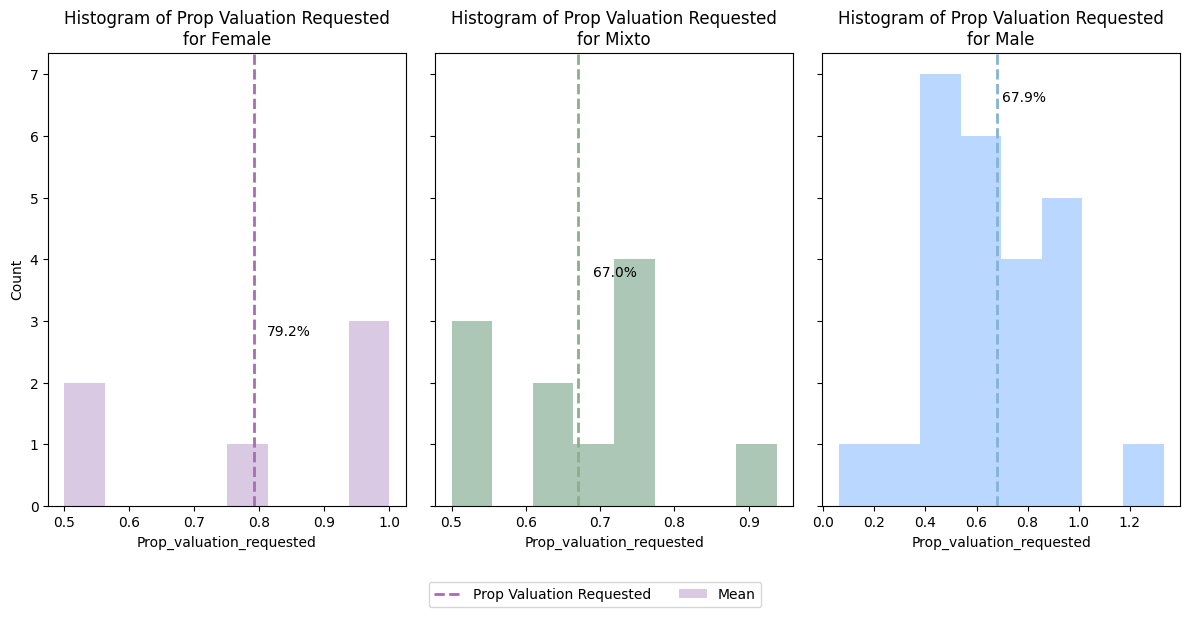

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample DataFrame creation for demonstration (Remove this when using your actual DataFrame)
# df_c = pd.DataFrame({
#     'Prop_valuation_requested': np.random.rand(100),  # Replace with your actual data
#     'Pitchers Gender': np.random.choice(['male', 'female', 'mixto'], size=100),  # Replace with your actual data
#     'Deal Valuation': np.random.rand(100) * 100,  # Replace with your actual data
#     'Valuation Requested': np.random.rand(100) * 100  # Replace with your actual data
# })

# Set colors for each gender
colors = {
    'female': '#D6C3E0',         # Pastel Violet
    'mixto': '#A3C1AD',          # Pastel Green
    'male': '#B3D4FF',           # Light Blue
}

# Set stronger colors for mean lines
mean_colors = {
    'female': '#A96BB3',         # Stronger Violet
    'mixto': '#8BAF8A',          # Stronger Green
    'male': '#85B3D4',           # Stronger Light Blue
}

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(colors), figsize=(12, 6), sharey=True)

# Store handles for the legend
legend_handles = []

# Iterate over unique genders and create a histogram for each
for ax, (gender, color) in zip(axes, colors.items()):
    # Filter data for the current gender
    data = df_c[(df_c['pitchers_gender'] == gender) & 
                 (df_c['deal_valuation'] > 0) & 
                 (df_c['valuation_requested'] > 0)]
    
    # Calculate the mean value for Prop_valuation_requested
    mean_value = data['Prop_valuation_requested'].mean()
    
    # Create histogram with seaborn
    sns.histplot(data, x='Prop_valuation_requested', kde=False, ax=ax, color=color, label='Prop Valuation Requested', alpha=0.9,
                 edgecolor=None, bins=8)
    
    # Add vertical line for the mean value with stronger color
    ax.axvline(mean_value, color=mean_colors[gender], linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    
    # Annotate the mean value on the histogram
    ax.text(mean_value + 0.02, ax.get_ylim()[1] * 0.9, f'{mean_value * 100:.1f}%', color='black', va='center')
  
    # Set titles and labels
    ax.set_title(f'Histogram of Prop Valuation Requested\nfor {gender.capitalize()}')
    
    # Collect handles for the legend
    handles, labels = ax.get_legend_handles_labels()
    legend_handles.extend(handles)

# Create a single legend below all subplots
fig.legend(legend_handles, ['Prop Valuation Requested', 'Mean'], loc='center', 
           bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=True)

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the legend
plt.show()


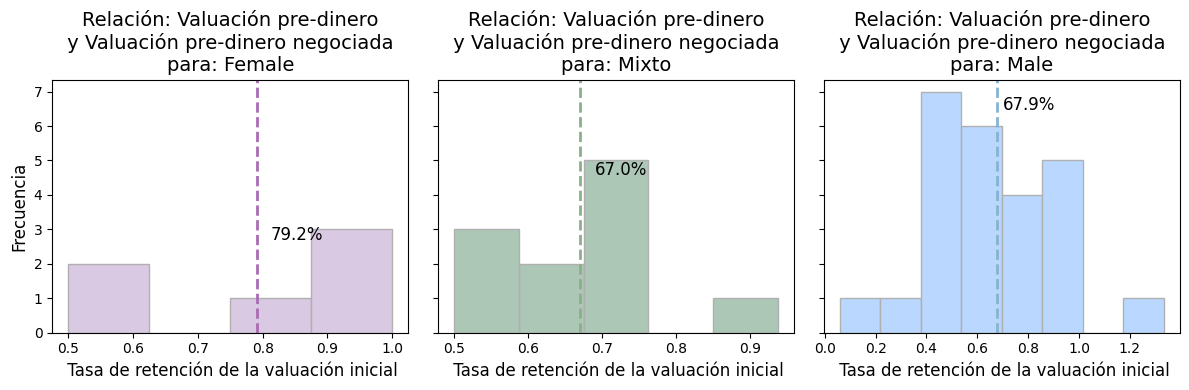

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos de ejemplo (reemplazar con tu DataFrame real)
# df_c = pd.DataFrame({
#     'Prop_valuation_requested': np.random.rand(100),  # Reemplazar con tus datos reales
#     'pitchers_gender': np.random.choice(['male', 'female', 'mixto'], size=100),  # Reemplazar con tus datos reales
#     'deal_valuation': np.random.rand(100) * 100,  # Reemplazar con tus datos reales
#     'valuation_requested': np.random.rand(100) * 100  # Reemplazar con tus datos reales
# })

# Colores por género
colores = {
    'female': '#D6C3E0',         # Violeta pastel
    'mixto': '#A3C1AD',          # Verde pastel
    'male': '#B3D4FF',           # Azul claro
}

# Colores más intensos para las líneas de las medias
colores_medias = {
    'female': '#A96BB3',         # Violeta más intenso
    'mixto': '#8BAF8A',          # Verde más intenso
    'male': '#85B3D4',           # Azul más intenso
}

# Configurar el tamaño de la figura para subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(colores), figsize=(12, 4), sharey=True)  # Altura ajustada (4 en vez de 6)

# Iterar sobre los géneros únicos y crear un histograma para cada uno
for ax, (genero, color) in zip(axes, colores.items()):
    # Filtrar datos para el género actual
    datos = df_c[
        (df_c['pitchers_gender'] == genero) & 
        (df_c['deal_valuation'] > 0) & 
        (df_c['valuation_requested'] > 0)
    ]
    
    # Calcular el valor medio de 'Prop_valuation_requested'
    media_valor = datos['Prop_valuation_requested'].mean()
    
    # Crear histograma con seaborn
    sns.histplot(datos, x='Prop_valuation_requested', kde=False, ax=ax, color=color, alpha=0.9, edgecolor='#B0B0B0')
    
    # Agregar una línea vertical para la media
    ax.axvline(media_valor, color=colores_medias[genero], linestyle='dashed', linewidth=2)
    
    # Anotar el valor medio en el histograma
    ax.text(media_valor + 0.02, ax.get_ylim()[1] * 0.9, f'{media_valor * 100:.1f}%', color='black', va='center', fontsize=12)
  
    # Títulos y etiquetas en español
    ax.set_title(f'Relación: Valuación pre-dinero\n y Valuación pre-dinero negociada \npara: {genero.capitalize()}', fontsize=14)
    ax.set_xlabel(' Tasa de retención de la valuación inicial', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustar diseño para mejorar la apariencia
plt.tight_layout()
plt.show()


In [ ]:
df_c['equity']=df_c['deal_valuation']/df_c['valuation_requested']

In [15]:
df_c['total_deal_equity']

0        0
1      10%
2     0,21
3      0,2
4        0
      ... 
73    0,00
74    0,16
75    0,15
76    0,20
77    0,15
Name: total_deal_equity, Length: 78, dtype: object

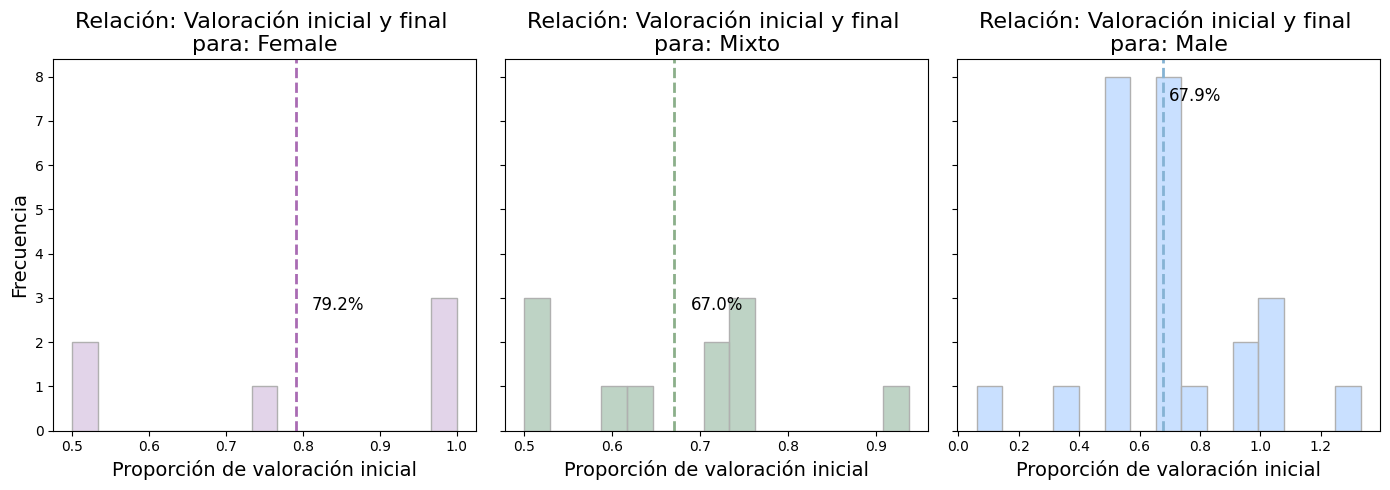

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos de ejemplo (reemplazar con tu DataFrame real)
# df_c = pd.DataFrame({
#     'Prop_valuation_requested': np.random.rand(100),  # Reemplazar con tus datos reales
#     'pitchers_gender': np.random.choice(['male', 'female', 'mixto'], size=100),  # Reemplazar con tus datos reales
#     'deal_valuation': np.random.rand(100) * 100,  # Reemplazar con tus datos reales
#     'valuation_requested': np.random.rand(100) * 100  # Reemplazar con tus datos reales
# })

# Colores por género
colores = {
    'female': '#D6C3E0',         # Violeta pastel
    'mixto': '#A3C1AD',          # Verde pastel
    'male': '#B3D4FF',           # Azul claro
}

# Colores más intensos para las líneas de las medias
colores_medias = {
    'female': '#A96BB3',         # Violeta más intenso
    'mixto': '#8BAF8A',          # Verde más intenso
    'male': '#85B3D4',           # Azul más intenso
}

# Configurar el tamaño de la figura para subgráficos
fig, axes = plt.subplots(nrows=1, ncols=len(colores), figsize=(14, 5), sharey=True)  # Ajustar tamaño de la figura

# Iterar sobre los géneros únicos y crear un histograma para cada uno
for ax, (genero, color) in zip(axes, colores.items()):
    # Filtrar datos para el género actual
    datos = df_c[
        (df_c['pitchers_gender'] == genero) & 
        (df_c['deal_valuation'] > 0) & 
        (df_c['valuation_requested'] > 0)
    ]
    
    # Calcular el valor medio de 'Prop_valuation_requested'
    media_valor = datos['Prop_valuation_requested'].mean()
    
    # Crear histograma con seaborn, ajustar el número de bins y cambiar el color del borde
    sns.histplot(datos, x='Prop_valuation_requested', kde=False, ax=ax, color=color, alpha=0.7, bins=15, edgecolor='#B0B0B0')  # Gris claro para el borde
    
    # Agregar una línea vertical para la media
    ax.axvline(media_valor, color=colores_medias[genero], linestyle='dashed', linewidth=2)
    
    # Anotar el valor medio en el histograma
    ax.text(media_valor + 0.02, ax.get_ylim()[1] * 0.9, f'{media_valor * 100:.1f}%', color='black', va='center', fontsize=12)
  
    # Títulos y etiquetas en español con mayor tamaño de fuente
    ax.set_title(f'Relación: Valoración inicial y final \npara: {genero.capitalize()}', fontsize=16)
    ax.set_xlabel('Proporción de valoración inicial', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)

# Ajustar diseño para mejorar la apariencia
plt.tight_layout()
plt.show()


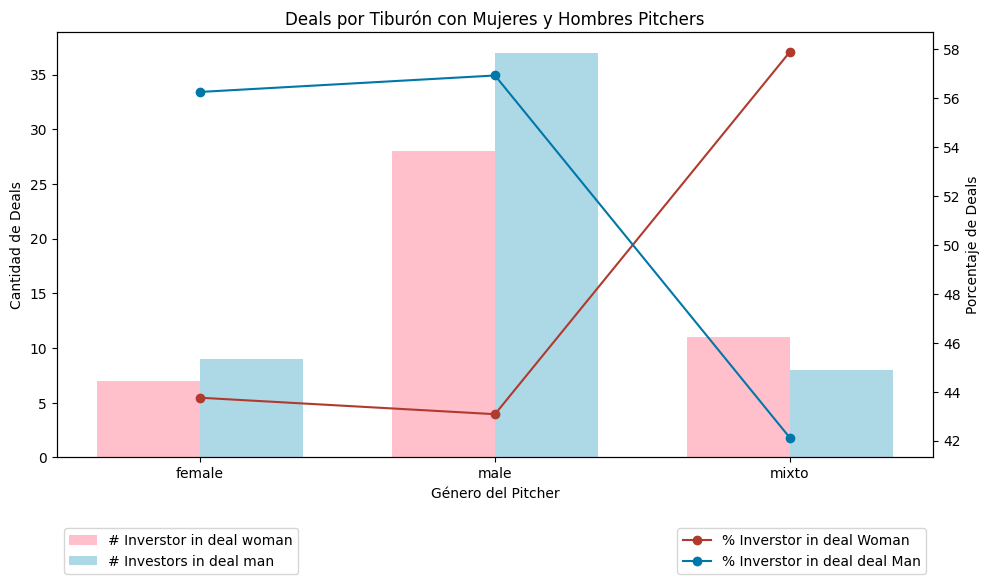

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Agrupar los datos por 'tiburon con deal mujer' y 'tiburon con deal hombre'
df_deal_gender = df_c.groupby('Pitchers Gender')[['tiburon con deal mujer', 'tiburon con deal hombre']].sum().reset_index()

# Calcular el total por género y añadir como columna
df_deal_gender['Total'] = df_deal_gender['tiburon con deal mujer'] + df_deal_gender['tiburon con deal hombre']

# Calcular el porcentaje de deals por género
df_deal_gender['Percentage Women'] = (df_deal_gender['tiburon con deal mujer'] / df_deal_gender['Total']) * 100
df_deal_gender['Percentage Men'] = (df_deal_gender['tiburon con deal hombre'] / df_deal_gender['Total']) * 100

# Configurar la figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear barras para los números de deals
bar_width = 0.35
indices = np.arange(len(df_deal_gender))

ax1.bar(indices, df_deal_gender['tiburon con deal mujer'], bar_width, color='#FFC0CB', label='# Inverstor in deal woman')
ax1.bar(indices + bar_width, df_deal_gender['tiburon con deal hombre'], bar_width, color='#ADD8E6', label='# Investors in deal man')

# Añadir títulos y etiquetas para el eje izquierdo (cantidad de deals)
ax1.set_xlabel('Género del Pitcher')
ax1.set_ylabel('Cantidad de Deals', color='black')
ax1.set_title('Deals por Tiburón con Mujeres y Hombres Pitchers')
ax1.set_xticks(indices + bar_width / 2)
ax1.set_xticklabels(df_deal_gender['Pitchers Gender'])

# Añadir leyenda del primer eje Y
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=True)

# Crear un segundo eje Y (derecho) para los porcentajes
ax2 = ax1.twinx()
ax2.plot(indices + bar_width / 2, df_deal_gender['Percentage Women'], color='#B03A2E', marker='o', linestyle='-', label='% Inverstor in deal Woman')  # Marine Blue
ax2.plot(indices + bar_width / 2, df_deal_gender['Percentage Men'], color='#0077A8', marker='o', linestyle='-', label='% Inverstor in deal deal Man')  # Burnt Red

# Añadir etiquetas y títulos para el eje derecho (porcentajes)
ax2.set_ylabel('Porcentaje de Deals', color='black')

# Añadir leyenda del segundo eje Y
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()




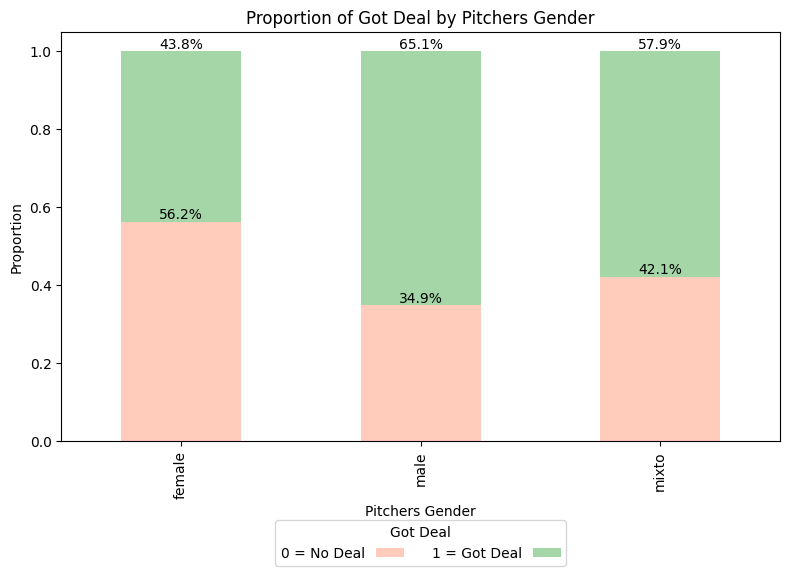

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tab of 'Pitchers Gender' and 'Got Deal'
deal_proportion = pd.crosstab(df_c['Pitchers Gender'], df_c['Got Deal'], normalize='index')

# Stacked bar plot for proportion of 'Got Deal' by 'Pitchers Gender'
ax = deal_proportion.plot(kind='bar', stacked=True, color=['#FFCCBC', '#A5D6A7'], figsize=(8, 6))

# Add percentage labels on each bar
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = f'{height:.1%}'  # Convert height to percentage format
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.title('Proportion of Got Deal by Pitchers Gender')
plt.ylabel('Proportion')
plt.xlabel('Pitchers Gender')

# Modify legend to use square markers, position it below the graph, and set it to horizontal
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0 = No Deal', '1 = Got Deal'], title='Got Deal', loc='center', 
           bbox_to_anchor=(0.5, -0.25), frameon=True, markerfirst=False, ncol=2)  # Adjusted vertical position

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()



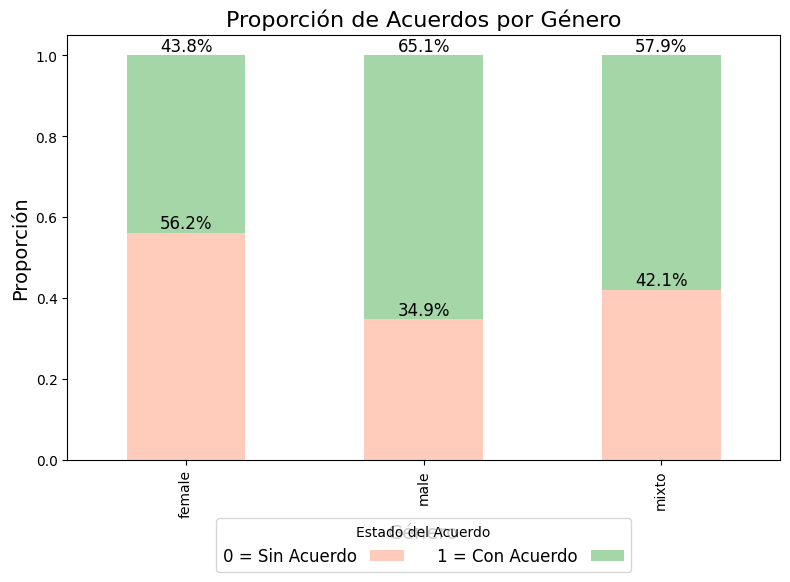

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una tabla cruzada de 'Pitchers Gender' y 'Got Deal'
deal_proportion = pd.crosstab(df_c['pitchers_gender'], df_c['got_deal'], normalize='index')

# Gráfico de barras apiladas para la proporción de 'Got Deal' por género
ax = deal_proportion.plot(kind='bar', stacked=True, color=['#FFCCBC', '#A5D6A7'], figsize=(8, 6))  # Menor altura

# Agregar etiquetas de porcentaje en cada barra
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height
    percentage = f'{height:.1%}'  # Convertir altura a formato de porcentaje
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)  # Aumentar tamaño de letra a 12

# Ajustar los títulos y etiquetas en español
plt.title('Proporción de Acuerdos por Género', fontsize=16)  # Título más grande
plt.ylabel('Proporción', fontsize=14)  # Etiqueta del eje Y más grande
plt.xlabel('Género', fontsize=14)  # Etiqueta del eje X más grande

# Modificar la leyenda para usar marcadores cuadrados y posicionarla debajo del gráfico
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0 = Sin Acuerdo', '1 = Con Acuerdo'], title='Estado del Acuerdo', 
          loc='center', bbox_to_anchor=(0.5, -0.2), frameon=True, markerfirst=False, ncol=2, fontsize=12)  # Ajuste de posición

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()  # Ajustar diseño para hacer espacio para la leyenda
plt.show()


In [148]:
# regrsion logistica deal o no deal :
#variables 

In [11]:
df_c[['Valuation Requested','Industry','Pitchers Gender','number of females']]
df_c['Got Deal']

0     1
1     1
2     1
3     1
4     0
     ..
73    0
74    1
75    1
76    1
77    1
Name: Got Deal, Length: 78, dtype: int64

In [12]:
df_c['NEG_bins'] = pd.cut(df_c['NEG'], bins=3, labels=['Low', 'Medium', 'High'])
avg_got_deal_per_bin = df_c.groupby('NEG_bins')['Got Deal'].mean()
avg_got_deal_per_bin

NEG_bins
Low       0.714286
Medium    0.560000
High      0.181818
Name: Got Deal, dtype: float64

In [13]:
df_c['POS_bins'] = pd.cut(df_c['POS'], bins=3, labels=['Low', 'Medium', 'High'])
avg_got_deal_per_bin = df_c.groupby('POS_bins')['Got Deal'].mean()
avg_got_deal_per_bin

POS_bins
Low       0.535714
Medium    0.666667
High      1.000000
Name: Got Deal, dtype: float64

In [14]:
df_c['Pitchers Gender'].unique()
df_c=df_c.rename(columns={'NEG':'avg_neg_sentiment_inv',
                'NEU':'avg_neu_sentiment_inv',
                'POS':'avg_pos_sentiment_inv',
                'Valuation Requested':'valuation_requested',
                })

In [ ]:
   'Pitchers Gender_mixto':'pitcher_gender_mixed',
                 'Industry_Alimentos':'food_industry'
                 'Industry_Salud':'health_industry'


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from scipy.stats import ks_2samp
import shap
import matplotlib.pyplot as plt
import shap
df_c=df_c[df_c['valuation_requested'].notnull()]
# Step 1: Preprocess the categorical variables using OneHotEncoder

category_counts = df_c['industry clean '].value_counts()

# Replace low-frequency categories with "Other"
low_observation_categories = category_counts[category_counts <= 2].index
df_c['industry clean '] = df_c['industry clean '].apply(
    lambda x: 'Other' if x in low_observation_categories else x
)

# One-hot encoding
industry_encoded = pd.get_dummies(df_c['industry clean '], prefix='Industry')
#df_c1 = pd.concat([df_c[['Valuation Requested', 'number of females']], industry_encoded], axis=1)
industry_encoded=industry_encoded.astype('int')

X = pd.concat([df_c[['valuation_requested', 'Pitchers Gender', 'number of females','avg_pos_sentiment_inv','avg_neg_sentiment_inv','avg_neu_sentiment_inv']], industry_encoded], axis=1)
y = df_c['Got Deal']




#'Industry'
# Initialize OneHotEncoder without sparse argument
encoder = OneHotEncoder(drop='first', sparse=False)  # sparse_output=False to get dense arrays

# Fit and transform the categorical features
X_encoded_categorical = encoder.fit_transform(X[['Pitchers Gender']])

# Convert encoded categorical features into a DataFrame
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, 
                                        columns=encoder.get_feature_names_out())


# Combine the encoded categorical features with the 'Valuation Requested' column
X_encoded = pd.concat([X_encoded_categorical_df, X[list(industry_encoded)+['valuation_requested','number of females','number of females','avg_pos_sentiment_inv','avg_neg_sentiment_inv','avg_neu_sentiment_inv']].reset_index(drop=True)], axis=1)
X_encoded['pitchers_gender_male_neg_inter']=X_encoded['avg_neg_sentiment_inv']* X_encoded['Pitchers Gender_male']


X_encoded=X_encoded.rename(columns={'Industry_Alimentos':'food_industry',
                 'Industry_Salud':'health_industry',
                 'Pitchers Gender_male':'pitchers_gender_male',
                  'Pitchers Gender_mixto':'pitchers_gender_mixed'
                })

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Precision: 0.00
Recall: 0.00
ROC-AUC: 0.43
KS Statistic: 0.50


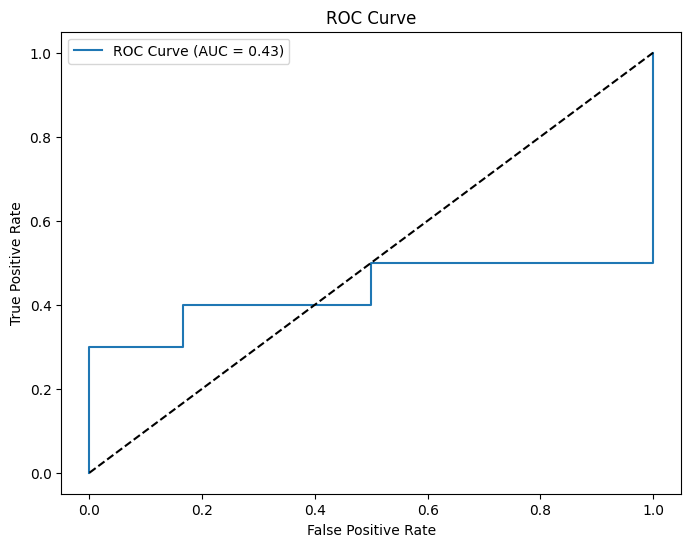

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


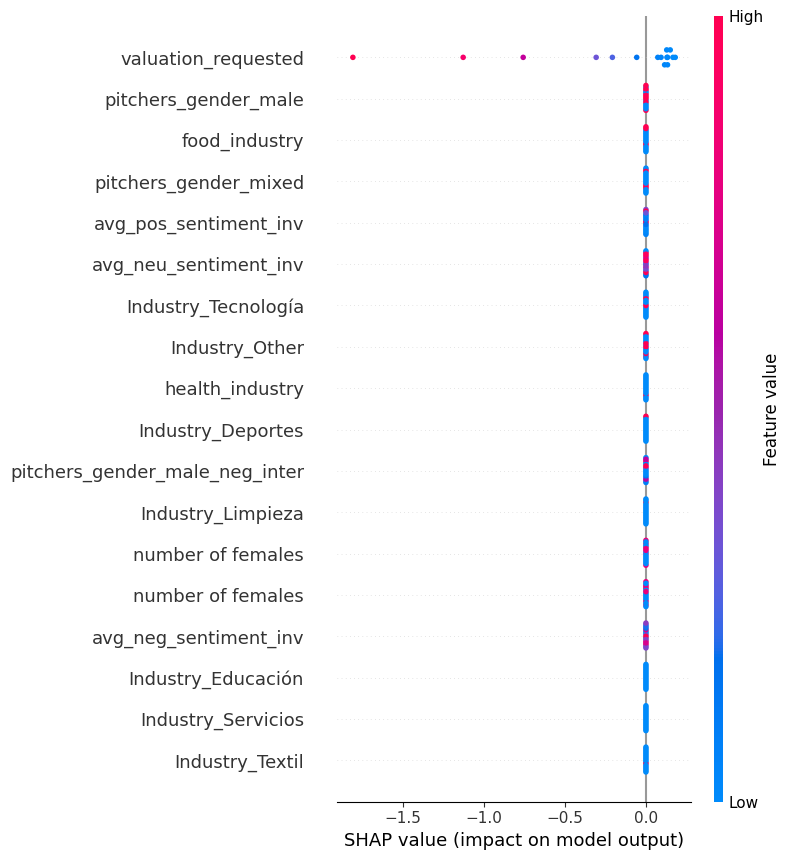

In [19]:

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # You can increase max_iter if needed
log_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg.predict(X_test)

# Step 5: Get SHAP values
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)


# Step 3: Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability predictions for ROC and KS

# Step 5: Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# KS statistic calculation
ks_stat, ks_p_value = ks_2samp(y_pred_proba[y_test == 1], y_pred_proba[y_test == 0])

# Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"KS Statistic: {ks_stat:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Get SHAP values
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)

# Step 7: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from scipy.stats import ks_2samp
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Filter and preprocess the data
df_c = df_c[df_c['valuation_requested'].notnull()].copy()
category_counts = df_c['industry clean '].value_counts()

# Replace low-frequency categories with "Other"
low_observation_categories = category_counts[category_counts <= 2].index
df_c['industry clean '] = df_c['industry clean '].apply(
    lambda x: 'Other' if x in low_observation_categories else x
)

# One-hot encoding
industry_encoded = pd.get_dummies(df_c['industry clean '], prefix='Industry').astype('int')

X = pd.concat([df_c[['valuation_requested', 'Pitchers Gender', 'number of females','avg_pos_sentiment_inv','avg_neg_sentiment_inv','avg_neu_sentiment_inv']], industry_encoded], axis=1)
y = df_c['Got Deal']

# Initialize OneHotEncoder for categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded_categorical = encoder.fit_transform(X[['Pitchers Gender']])

# Convert encoded categorical features into a DataFrame
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, 
                                        columns=encoder.get_feature_names_out())

# Combine the encoded categorical features with the other features
X_encoded = pd.concat([X_encoded_categorical_df, 
                       X[['valuation_requested', 'number of females','avg_pos_sentiment_inv','avg_neg_sentiment_inv','avg_neu_sentiment_inv']].reset_index(drop=True), 
                       industry_encoded.reset_index(drop=True)], axis=1)


X_encoded['pitchers_gender_male_neg_inter']=X_encoded['avg_neg_sentiment_inv']* X_encoded['Pitchers Gender_male']


X_encoded=X_encoded.rename(columns={'Industry_Alimentos':'food_industry',
                 'Industry_Salud':'health_industry',
                 'Pitchers Gender_male':'pitchers_gender_male',
                  'Pitchers Gender_mixto':'pitchers_gender_mixed'
                })

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Configurar el modelo base de XGBoost para RFECV
base_xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=4)

# Aplicar RFECV para selección de características
selector = RFECV(estimator=base_xgb_model, step=1, cv=5, scoring='roc_auc', n_jobs=-1)
selector.fit(X_train, y_train)

# Seleccionar las características elegidas por RFECV
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)



`use_label_encoder` is deprecated in 1.7.0.
/opt/anaconda3/envs/pfae_rejection_167/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/pfae_rejection_167/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/pfae_rejection_167/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/pfae_rejection_167/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/anaconda3/envs/pfae_rejection_167/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `us

In [31]:
X_encoded

,pitchers_gender_male,pitchers_gender_mixed,valuation_requested,number of females,avg_pos_sentiment_inv,avg_neg_sentiment_inv,avg_neu_sentiment_inv,food_industry,Industry_Deportes,Industry_Educación,Industry_Limpieza,Industry_Other,health_industry,Industry_Servicios,Industry_Tecnología,Industry_Textil,pitchers_gender_male_neg_inter
0,0.0,0.0,40000000.0,1,0.139865,0.330917,0.529219,0,0,0,0,0,1,0,0,0,0.000000
1,0.0,1.0,80000000.0,1,0.112291,0.333049,0.554660,0,0,0,0,0,0,0,1,0,0.000000
2,0.0,1.0,6666667.0,1,0.257588,0.265485,0.476927,1,0,0,0,0,0,0,0,0,0.000000
3,1.0,0.0,10000000.0,0,0.181121,0.288994,0.529884,1,0,0,0,0,0,0,0,0,0.288994
4,1.0,0.0,25000000.0,0,0.114063,0.363576,0.522361,0,0,0,0,1,0,0,0,0,0.363576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,7142857.0,2,0.521163,0.086432,0.392404,0,0,0,0,0,0,0,0,1,0.000000
73,0.0,1.0,2000000.0,1,0.346168,0.273114,0.380718,0,0,0,0,0,1,0,0,0,0.000000
74,1.0,0.0,7800000.0,0,0.713634,0.048491,0.237875,1,0,0,0,0,0,0,0,0,0.048491
75,0.0,0.0,5000000.0,1,0.586590,0.070185,0.343226,1,0,0,0,0,0,0,0,0,0.000000


In [26]:

print("Optimal number of features : %d" % selector.n_features_)
print("Optimal number of features : ",selector.n_features_)

Optimal number of features : 8
Optimal number of features :  8


Optimal number of features : 8


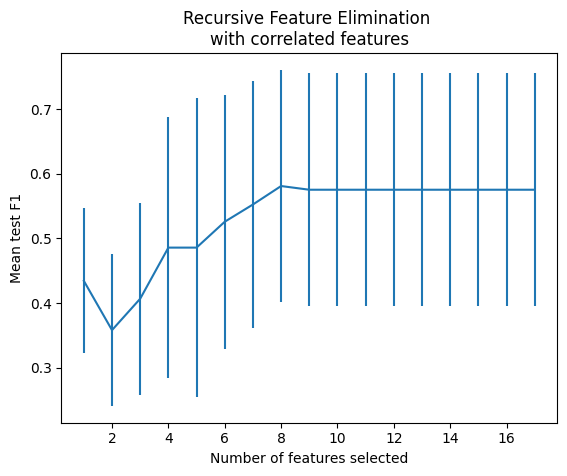

In [27]:
print("Optimal number of features : %d" % selector.n_features_)

n_scores = len(selector.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test F1")
plt.errorbar(
    range(1, n_scores + 1),
    selector.cv_results_["mean_test_score"],
    yerr=selector.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [28]:
selected_RFECV=list(X_train.columns[np.where(selector.support_ == True)[0]])
selected_RFECV

['pitchers_gender_mixed',
 'valuation_requested',
 'number of females',
 'avg_pos_sentiment_inv',
 'avg_neg_sentiment_inv',
 'avg_neu_sentiment_inv',
 'food_industry',
 'health_industry']

In [29]:
X_train.columns

Index(['pitchers_gender_male', 'pitchers_gender_mixed', 'valuation_requested',
       'number of females', 'avg_pos_sentiment_inv', 'avg_neg_sentiment_inv',
       'avg_neu_sentiment_inv', 'food_industry', 'Industry_Deportes',
       'Industry_Educación', 'Industry_Limpieza', 'Industry_Other',
       'health_industry', 'Industry_Servicios', 'Industry_Tecnología',
       'Industry_Textil', 'pitchers_gender_male_neg_inter'],
      dtype='object')

In [32]:
# Grid de hiperparámetros para XGBoost
param_grid = {
    "n_estimators": np.arange(100, 501, 50),
    "colsample_bytree": np.linspace(0.1, 0.7, 7),  # Reducido a 0.7 para evitar overfitting
    "max_depth": np.arange(2, 5),
    "gamma": np.linspace(0, 50, 10),
    "eta": np.linspace(0.0001, 0.01, 10),
    "min_child_weight": np.linspace(0.5, 10, 10),
    "alpha": np.linspace(0, 60, 10),
    "lambda": np.linspace(0, 60, 10),
    "subsample": np.linspace(0.1, 0.7, 7),  # Reducido a 0.7 para evitar overfitting
    "colsample_bylevel": np.linspace(0.1, 0.7, 7),
    "colsample_bynode": np.linspace(0.1, 0.7, 7),
    "max_delta_step": np.linspace(0, 50, 10),
    # Puedes agregar otros parámetros de tu elección aquí
}

# Instanciar el modelo con las características seleccionadas
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Aplicar RandomizedSearchCV para la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,  # Número de combinaciones de hiperparámetros a probar
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Entrenar con los datos de entrenamiento seleccionados
random_search.fit(X_train_selected, y_train)

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
       27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.        ]),
                     

In [33]:

model=random_search.best_estimator_


In [34]:
selected_RFECV




['pitchers_gender_mixed',
 'valuation_requested',
 'number of females',
 'avg_pos_sentiment_inv',
 'avg_neg_sentiment_inv',
 'avg_neu_sentiment_inv',
 'food_industry',
 'health_industry']

Precision: 0.62
Recall: 1.00
ROC-AUC: 0.62
KS Statistic: 0.37


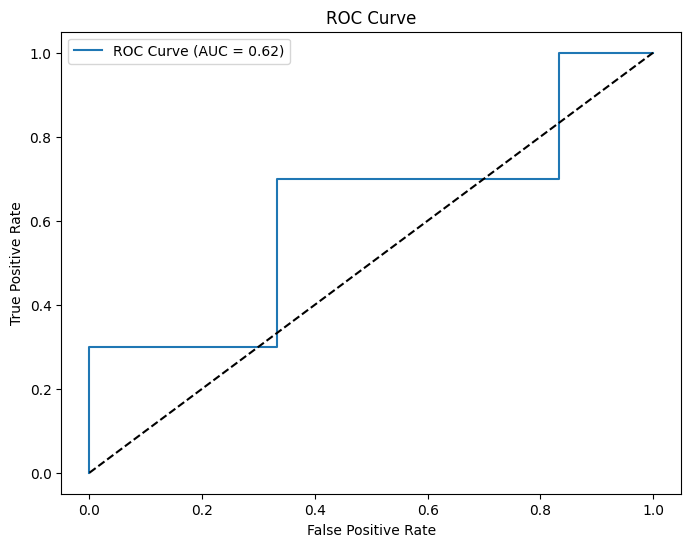

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


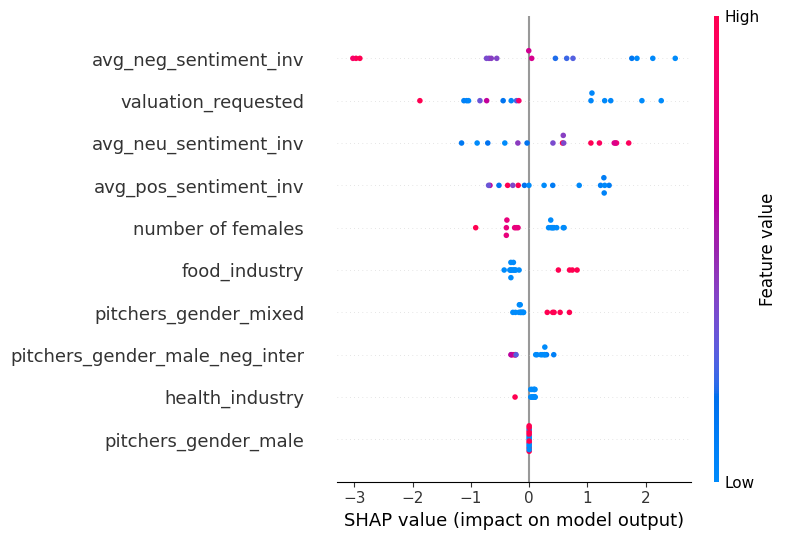

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_RFECV+['pitchers_gender_male_neg_inter','pitchers_gender_male']], y, test_size=0.2, random_state=42)


xgb_model.fit(X_train, y_train)



# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

y_pred = random_search.best_estimator_.predict(X_test_selected)
y_pred_proba = random_search.best_estimator_.predict_proba(X_test_selected)[:, 1]

# Step 5: Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# KS statistic calculation
ks_stat, ks_p_value = ks_2samp(y_pred_proba[y_test == 1], y_pred_proba[y_test == 0])

# Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"KS Statistic: {ks_stat:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Get SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Step 7: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=list(X_test))

In [38]:
selected_RFECV+['pitchers_gender_male_neg_inter','pitchers_gender_male']

['pitchers_gender_mixed',
 'valuation_requested',
 'number of females',
 'avg_pos_sentiment_inv',
 'avg_neg_sentiment_inv',
 'avg_neu_sentiment_inv',
 'food_industry',
 'health_industry',
 'pitchers_gender_male_neg_inter',
 'pitchers_gender_male']

In [58]:
X_encoded['Pitchers Gender_male'].value_counts()

1.0    42
0.0    35
Name: Pitchers Gender_male, dtype: int64

In [60]:
42+35

77

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


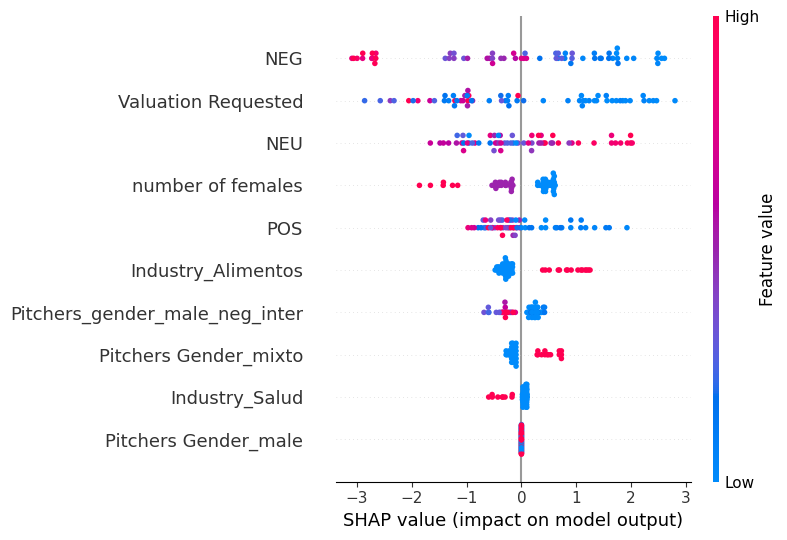

In [59]:
# Step 6: Get SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=list(X_train))

In [40]:
list(X_test)

['Pitchers Gender_mixto',
 'Valuation Requested',
 'number of females',
 'POS',
 'NEG',
 'NEU',
 'Industry_Alimentos',
 'Industry_Salud',
 'Pitchers_gender_male_neg_inter']

In [ ]:
#interaccion producto negativo  comentarios por el genero feture


Precision: 0.75
Recall: 0.90
ROC-AUC: 0.63
KS Statistic: 0.40


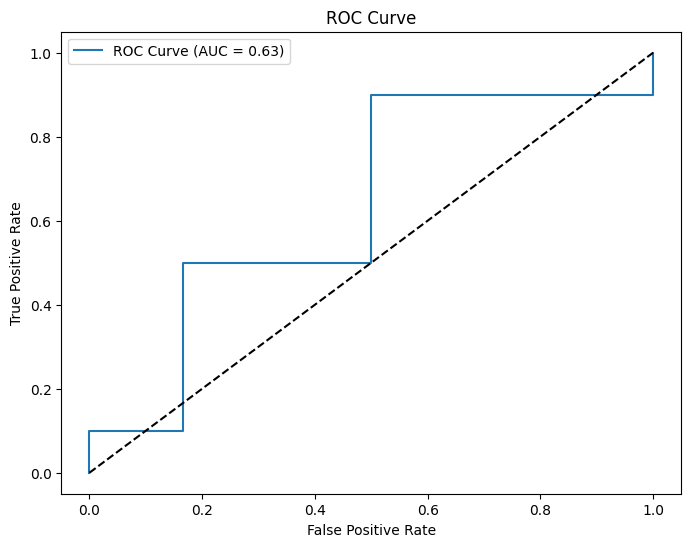

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


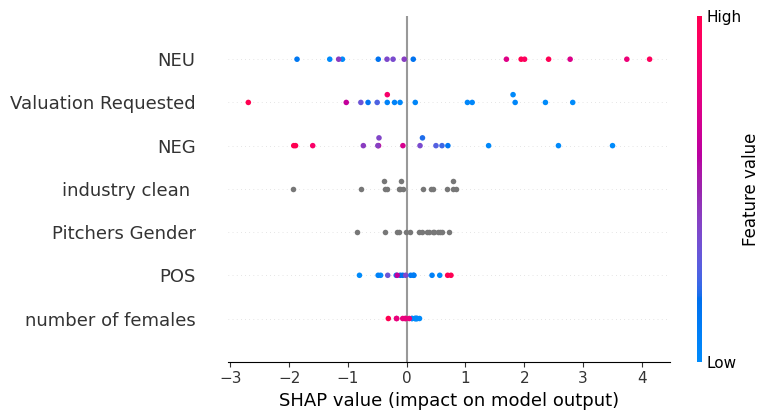

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from scipy.stats import ks_2samp
import catboost as cb
import shap
import matplotlib.pyplot as plt

# Step 1: Filter and preprocess the data
df_c = df_c[df_c['Valuation Requested'].notnull()].copy()
category_counts = df_c['industry clean '].value_counts()

# Replace low-frequency categories with "Other"
low_observation_categories = category_counts[category_counts <= 2].index
df_c['industry clean '] = df_c['industry clean '].apply(
    lambda x: 'Other' if x in low_observation_categories else x
)

# Prepare features and target
X = df_c[['Valuation Requested', 'Pitchers Gender', 'number of females', 'industry clean ','POS','NEG','NEU']]
y = df_c['Got Deal']

# Specify categorical feature columns for CatBoost
categorical_features = ['Pitchers Gender', 'industry clean ']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the CatBoost model
catboost_model = cb.CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)
catboost_model.fit(X_train, y_train, cat_features=categorical_features)

# Step 4: Make predictions
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

# Step 5: Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# KS statistic calculation
ks_stat, ks_p_value = ks_2samp(y_pred_proba[y_test == 1], y_pred_proba[y_test == 0])

# Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"KS Statistic: {ks_stat:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 6: Get SHAP values
explainer = shap.Explainer(catboost_model)
shap_values = explainer(X_test)

# Step 7: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import shap
from xgboost import XGBClassifier

# Filter data to include only rows where 'Valuation Requested' is not null
df_c = df_c[df_c['Valuation Requested'].notnull()]

# Define features and target variable
X = df_c[['Valuation Requested', 'Pitchers Gender', 'number of females']]
y = df_c['Got Deal']

# Step 1: Preprocess the categorical variable using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded_categorical = encoder.fit_transform(X[['Pitchers Gender']])
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out())

# Combine encoded features with 'Valuation Requested' and 'number of females'
X_encoded = pd.concat([X_encoded_categorical_df, X[['Valuation Requested', 'number of females']].reset_index(drop=True)], axis=1)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Fit the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Disabling use_label_encoder for compatibility
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Get SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Step 6: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import shap
df_c=df_c[df_c['Valuation Requested'].notnull()]
# Step 1: Preprocess the categorical variables using OneHotEncoder
X = df_c[['Valuation Requested', 'Pitchers Gender', 'number of females']]
y = df_c['Got Deal']
#'Industry'
# Initialize OneHotEncoder without sparse argument
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False to get dense arrays

# Fit and transform the categorical features
X_encoded_categorical = encoder.fit_transform(X[[ 'Pitchers Gender']])

# Convert encoded categorical features into a DataFrame
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, 
                                        columns=encoder.get_feature_names_out())

# Combine the encoded categorical features with the 'Valuation Requested' column
X_encoded = pd.concat([X_encoded_categorical_df, X[['Valuation Requested']].reset_index(drop=True)], axis=1)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # You can increase max_iter if needed
log_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_reg.predict(X_test)

# Step 5: Get SHAP values
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_test)

# Step 6: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import shap

# Ensure 'Valuation Requested' is not null
df_c = df_c[df_c['Valuation Requested'].notnull()]

# Step 1: Preprocess the categorical variables using OneHotEncoder
X = df_c[['Valuation Requested', 'Pitchers Gender', 'number of females']]
y = df_c['Got Deal']

# Initialize OneHotEncoder without sparse argument
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical features
X_encoded_categorical = encoder.fit_transform(X[['Pitchers Gender']])

# Convert encoded categorical features into a DataFrame
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, 
                                        columns=encoder.get_feature_names_out())

# Combine the encoded categorical features with the 'Valuation Requested' and 'number of females' columns
X_encoded = pd.concat([X_encoded_categorical_df, 
                       X[['Valuation Requested', 'number of females']].reset_index(drop=True)], axis=1)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 3: Fit the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              max_depth=3, 
                              learning_rate=0.001, 
                              reg_lambda=1,   # L2 regularization to control overfitting
                              n_estimators=500,  # Number of boosting rounds
                              random_state=42)

xgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 5: Get SHAP values
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Step 6: Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <04125532-9495-3051-97BC-F23BE76BA2F9> /opt/anaconda3/envs/estancia_investigacion/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/opt/anaconda3/envs/estancia_investigacion/lib/python3.9/lib-dynload/../../libomp.dylib' (no such file), '/opt/anaconda3/envs/estancia_investigacion/bin/../lib/libomp.dylib' (no such file)"]


In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install shap

  Using cached shap-0.46.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (24 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.60.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (4.8 kB)
Using cached shap-0.46.0-cp39-cp39-macosx_10_9_x86_64.whl (459 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.60.0-cp39-cp39-macosx_10_9_x86_64.whl (2.6 MB)
Using cached llvmlite-0.43.0-cp39-cp39-macosx_10_9_x86_64.whl (31.1 MB)
Note: you may need to restart the kernel to use updated packages.
